In [1]:
# calculate the terms in governing equation
# check the value of the diffusion fluxes

In [2]:
import cantera as ct
import numpy as np
import matplotlib.pyplot as plt
from counterflow_file import *

In [3]:
flame_params = {}
flame_params['F'] = 'CH4'
flame_params['p'] = 1
flame_params['a'] = 200
flame_params['phif'] = 3.2
flame_params['phio'] = 0
flame_params['tf'] = 300
flame_params['to'] = 300

In [4]:
flame_name = params2name( flame_params )

In [23]:
gas = ct.Solution('gri30.xml')

In [25]:
gas()


  gri30:

       temperature             300  K
          pressure          101325  Pa
           density       0.0818891  kg/m^3
  mean mol. weight         2.01588  amu

                          1 kg            1 kmol
                       -----------      ------------
          enthalpy           26470        5.336e+04     J
   internal energy     -1.2109e+06       -2.441e+06     J
           entropy           64914        1.309e+05     J/K
    Gibbs function     -1.9448e+07        -3.92e+07     J
 heat capacity c_p           14312        2.885e+04     J/K
 heat capacity c_v           10187        2.054e+04     J/K

                           X                 Y          Chem. Pot. / RT
                     -------------     ------------     ------------
                H2              1                1         -15.7173
     [  +52 minor]              0                0



In [26]:
f = ct.CounterflowDiffusionFlame(gas, width=0.01)

In [29]:
f.save('{}.xml'.format(flame_name))

Solution saved to file F-CH4_p-1_a-200_phif-3.2_phio-0_tf-300_to-300.xml as solution solution.


In [30]:
f.restore('{}.xml'.format(flame_name))

Grid contains 6 points.
Importing datasets:
axial velocity   radial velocity   temperature   lambda   H2   H   O   O2   OH   H2O   HO2   H2O2   C   CH   CH2   CH2(S)   CH3   CH4   CO   CO2   HCO   CH2O   CH2OH   CH3O   CH3OH   C2H   C2H2   C2H3   C2H4   C2H5   C2H6   HCCO   CH2CO   HCCOH   N   NH   NH2   NH3   NNH   NO   NO2   N2O   HNO   CN   HCN   H2CN   HCNN   HCNO   HOCN   HNCO   NCO   N2   AR   C3H7   C3H8   CH2CHO   CH3CHO   

In [40]:
f.restore('{}.xml'.format(flame_name), loglevel=2)

Grid contains 276 points.
Importing datasets:
axial velocity   radial velocity   temperature   lambda   H2   H   O   O2   OH   H2O   HO2   H2O2   C   CH   CH2   CH2(S)   CH3   CH4   CO   CO2   HCO   CH2O   CH2OH   CH3O   CH3OH   C2H   C2H2   C2H3   C2H4   C2H5   C2H6   HCCO   CH2CO   HCCOH   N   NH   NH2   NH3   NNH   NO   NO2   N2O   HNO   CN   HCN   H2CN   HCNN   HCNO   HOCN   HNCO   NCO   N2   AR   C3H7   C3H8   CH2CHO   CH3CHO   

In [8]:
mass_fraction_gradient = np.gradient(f.Y, f.grid, axis = 1)
mole_fraction_gradient = np.gradient(f.X, f.grid, axis = 1)
T_gradient = np.gradient(f.T, f.grid)

In [9]:
# convection term
budget_convection = f.density*f.u*mass_fraction_gradient

In [10]:
# reaction term
budget_reaction = (f.net_production_rates.transpose()*gas.molecular_weights).transpose()

In [11]:
# diffusion term
flux_uncorrected = f.density*f.mix_diff_coeffs_mass*mass_fraction_gradient
flux_sum = np.sum( flux_uncorrected, axis = 0)

In [12]:
flux = flux_uncorrected - flux_sum*f.Y

In [13]:
budget_diffusion = np.gradient(flux, f.grid, axis = 1)

In [14]:
residual_continuity = (np.gradient(f.density_mass*f.u, f.grid)+2.*f.density_mass*f.V)/np.gradient(f.density_mass*f.u, f.grid)

In [15]:
residual_species = (-budget_convection+budget_diffusion+budget_reaction)/budget_diffusion

In [16]:
residual_species[1]

array([ -2.54966387e+06,  -4.74450506e+00,   9.92918642e-01,
         9.20997583e+03,   2.05967600e+03,   9.97893641e+02,
         6.74417335e+02,   1.43177550e+02,  -1.00105385e+03,
         8.69322019e+02,   5.51127519e+02,   4.75891806e+01,
        -3.72603007e+02,   1.32919590e+02,   1.12805774e+02,
        -5.64909591e+00,   2.86263921e+01,  -7.14549025e+00,
         7.97962712e-01,   2.31778981e+00,  -4.95044085e+00,
         9.62654934e-01,   1.57218608e+00,  -4.53290815e-01,
         1.37414313e-02,   6.31559422e-02,   2.20914300e-01,
         5.39653432e-02,   1.47626019e-01,   1.26656422e-01,
         1.39068421e-01,   1.52830464e-01,   1.61260763e-01,
         1.69496850e-01,   1.73141547e-01,   1.66245652e-01,
         1.45491357e-01,   1.13786011e-01,   8.04877326e-02,
         4.78613499e-02,   2.49694445e-02,   2.36051804e-02,
         2.18025888e-02,   1.58975966e-02,   2.52370061e-02,
         4.60527236e-02,   6.69457739e-02,   7.77658581e-02,
         7.86639640e-02,

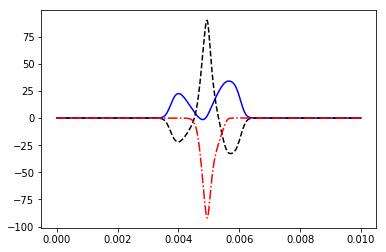

In [17]:
plt.plot(f.grid, -budget_convection[3], 'b-', f.grid, budget_diffusion[3], 'k--', f.grid, budget_reaction[3], 'r-.')

In [18]:
species_transport = -budget_convection + budget_diffusion + budget_reaction

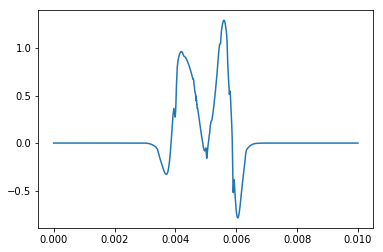

In [19]:
plt.plot(f.grid, species_transport[3])

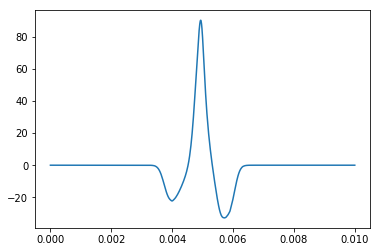

In [20]:
plt.plot(f.grid, budget_diffusion[3])

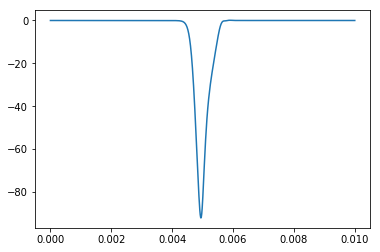

In [22]:
plt.plot(f.grid, budget_reaction[3])